In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import torch
import random
import os
import json
from tqdm import tqdm
from collections import defaultdict

In [2]:
with open('./japanese_characters.txt', 'r') as f:
    chars = f.read()

kanji_chars = chars[92:]

font_dirs = ['../all-fonts', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

/var/folders/8h/gq3wkjn971g716fqf8xqlpch0000gn/T/ipykernel_48126/1971218514.py:8: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = fm.createFontList(font_files)


In [32]:
style_font_paths = [
    '../all-fonts/BIZUDPMincho-Regular.ttf',
    '../all-fonts/851H-kktt_004.ttf',
    '../all-fonts/JP_NotoSerifJP-Regular.otf',
    '../all-fonts/03スマートフォントUI.otf',
    '../all-fonts/Corporate-Logo-Rounded-Bold-ver3.otf',
    '../all-fonts/851CHIKARA-DZUYOKU_kanaA_004.ttf',
    '../all-fonts/JK-Maru-Gothic-M.otf',
]
style_font_path = '../all-fonts/BIZUDPMincho-Regular.ttf'
style_name = os.path.splitext(os.path.basename(style_font_path))[0]
with open(f'../statistic/loss_dictionary/{style_name}_kanji.json', 'r') as f:
    all_loss_info = json.load(f)

In [70]:
columns = list(all_loss_info.keys())
index = list(kanji_chars)
data = np.zeros((len(index), len(columns)))
for i in range(len(columns)):
  tmp_column = [info['L1'] for info in list(all_loss_info[columns[i]].values())]
  data[:, i] = tmp_column

In [71]:
df = pd.DataFrame(data, index=index, columns=columns)
df

,亜,哀,挨,愛,曖,悪,握,圧,扱,宛,...,麓,論,和,話,賄,脇,惑,枠,湾,腕
亜,0.104956,0.109929,0.094249,0.129373,0.118473,0.118409,0.106034,0.102197,0.095165,0.127723,...,0.077178,0.118411,0.116978,0.121293,0.115676,0.180396,0.110899,0.088813,0.110723,0.128085
哀,0.137112,0.106508,0.105906,0.115391,0.128946,0.129581,0.160555,0.143251,0.127328,0.133545,...,0.121193,0.126556,0.138600,0.165630,0.125578,0.224142,0.129766,0.104751,0.122309,0.151152
挨,0.170790,0.177312,0.168346,0.209055,0.202867,0.199997,0.144462,0.187777,0.169624,0.187826,...,0.173120,0.178338,0.191819,0.151957,0.176008,0.169309,0.195797,0.176767,0.170622,0.171030
愛,0.186344,0.169290,0.183270,0.180475,0.171109,0.181671,0.194145,0.211275,0.182032,0.180245,...,0.179446,0.173849,0.166418,0.194559,0.176448,0.233657,0.177187,0.176681,0.176916,0.190868
曖,0.194421,0.158021,0.167888,0.167919,0.188840,0.180238,0.170221,0.229815,0.188230,0.161231,...,0.182378,0.195269,0.181777,0.197994,0.164176,0.192962,0.191326,0.178423,0.163362,0.155491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
脇,0.183398,0.198273,0.191575,0.236348,0.210561,0.222523,0.196944,0.191394,0.183820,0.205138,...,0.188795,0.195982,0.208598,0.192438,0.194984,0.211178,0.209107,0.192945,0.193626,0.191089
惑,0.255980,0.210355,0.217193,0.198058,0.221173,0.209630,0.230772,0.281563,0.237913,0.201250,...,0.232806,0.240792,0.240610,0.262806,0.212223,0.288391,0.219288,0.220635,0.206992,0.209184
枠,0.140103,0.132035,0.130370,0.139459,0.137552,0.142825,0.134645,0.158422,0.133281,0.126570,...,0.135695,0.121623,0.139732,0.151193,0.124797,0.162742,0.132303,0.132473,0.128272,0.134769
湾,0.193107,0.148509,0.161931,0.177974,0.198476,0.168949,0.152926,0.239543,0.179763,0.133285,...,0.184054,0.183085,0.225520,0.205801,0.150605,0.176162,0.188325,0.175746,0.151105,0.126053


In [18]:
np.min(np.mean(data, 0))

0.1619470224843085

In [31]:
char = '亜'
char_index = index.index(char)
tmp_data = data[:, char_index]
mean_value = np.mean(tmp_data)
max_char = index[np.argmax(tmp_data)]
max_value = np.max(tmp_data)
min_char = index[np.argmin(tmp_data)]
min_value = np.min(tmp_data)
print('mean value:', mean_value)
print(f'max char: {max_char}, value: {max_value}')
print(f'max char: {min_char}, value: {min_value}')
tmp_df = pd.DataFrame(tmp_data, index=index, columns=[char])

mean value: 0.17101194708144174
max char: 驚, value: 0.466876745223999
max char: 十, value: 0.0151402298361063


一


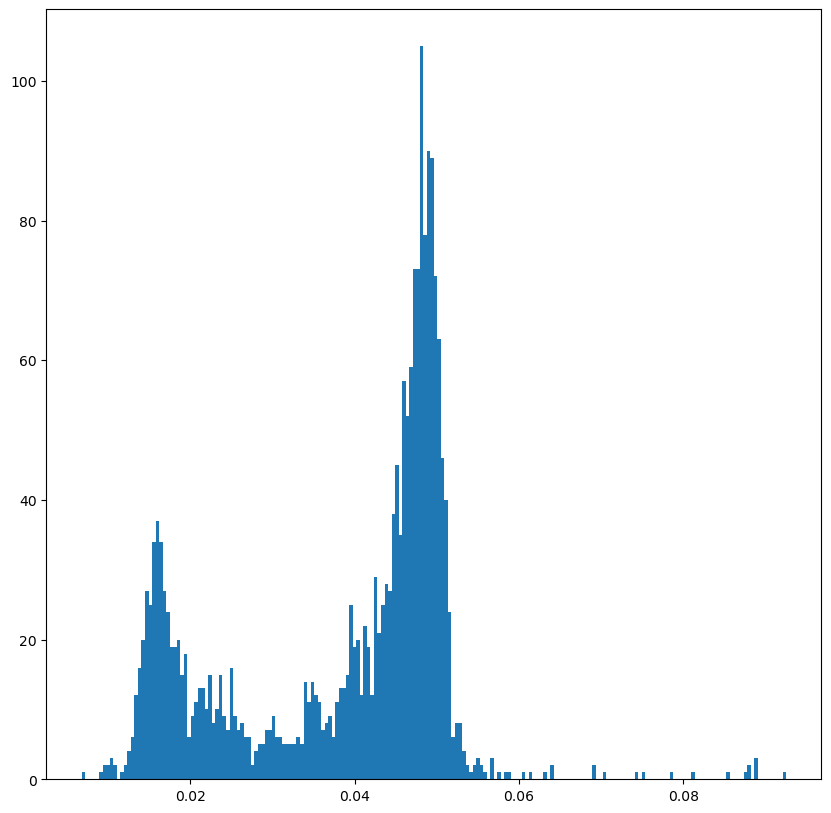

In [90]:
for char in ['一']:
    print(char)
    char_index = index.index(char)
    tmp_data = data[char_index, :]
    plt.figure(figsize=(10, 10))
    plt.hist(tmp_data, bins=200)
    plt.show()

## reconstructive difficulty

In [64]:
rd = np.mean(data, 1)
rd_sorted = np.sort(rd)
rd_sorted_key = [index[i] for i in np.argsort(rd)]
print(rd_sorted_key[:10])

['十', '二', '一', '人', '円', '口', '中', '下', '三', '小']


In [66]:
# relative reconstructive difficulty
rd_data = np.copy(data)
for i in range(len(columns)):
    rd_data[:, i] = [rd_data[j][i] / rd[j] for j in range(len(index))]

In [94]:
rd_df = pd.DataFrame(rd_data, index=index, columns=columns)
rd_df

,亜,哀,挨,愛,曖,悪,握,圧,扱,宛,...,麓,論,和,話,賄,脇,惑,枠,湾,腕
亜,0.858844,0.899532,0.771226,1.058640,0.969445,0.968927,0.867665,0.836265,0.778718,1.045136,...,0.631533,0.968941,0.957213,0.992523,0.946561,1.476158,0.907474,0.726747,0.906029,1.048101
哀,0.999143,0.776128,0.771739,0.840861,0.939637,0.944263,1.169970,1.043879,0.927848,0.973149,...,0.883139,0.922217,1.009986,1.206954,0.915094,1.633334,0.945611,0.763323,0.891275,1.101453
挨,0.909411,0.944141,0.896395,1.113163,1.080213,1.064929,0.769220,0.999863,0.903204,1.000121,...,0.921820,0.949601,1.021386,0.809129,0.937194,0.901526,1.042566,0.941239,0.908519,0.910688
愛,0.993717,0.902774,0.977325,0.962419,0.912475,0.968798,1.035318,1.126664,0.970721,0.961194,...,0.956929,0.927083,0.887457,1.037522,0.940942,1.246024,0.944883,0.942186,0.943440,1.017843
曖,1.060644,0.862067,0.915899,0.916062,1.030195,0.983270,0.928625,1.253733,1.026869,0.879577,...,0.994947,1.065270,0.991664,1.080135,0.895645,1.052687,1.043759,0.973369,0.891206,0.848264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
脇,0.899114,0.972035,0.939202,1.158703,1.032279,1.090925,0.965523,0.938311,0.901179,1.005695,...,0.925571,0.960807,1.022658,0.943433,0.955911,1.035304,1.025149,0.945919,0.949256,0.936815
惑,1.131375,0.929720,0.959945,0.875372,0.977533,0.926515,1.019961,1.244446,1.051519,0.889478,...,1.028947,1.064247,1.063443,1.161543,0.937975,1.274620,0.969202,0.975158,0.914856,0.924546
枠,1.029184,0.969918,0.957688,1.024456,1.010446,1.049186,0.989096,1.163755,0.979074,0.929776,...,0.996803,0.893438,1.026459,1.110657,0.916748,1.195493,0.971888,0.973137,0.942277,0.990008
湾,1.119647,0.861066,0.938886,1.031907,1.150777,0.979577,0.886675,1.388888,1.042280,0.772795,...,1.067158,1.061539,1.307581,1.193251,0.873215,1.021397,1.091923,1.018987,0.876118,0.730862


In [95]:
# charをstyleとして2,000字を生成した時
char = '倉'
char_index = index.index(char)
tmp_data = rd_data[:, char_index]
tmp_sorted_data = np.sort(tmp_data)
tmp_sorted_key = [index[i] for i in np.argsort(tmp_data)]
mean_value = np.mean(tmp_data)
max_char = index[np.argmax(tmp_data)]
max_value = np.max(tmp_data)
min_char = index[np.argmin(tmp_data)]
min_value = np.min(tmp_data)
print('mean value:', mean_value)
print(f'max char: {max_char}, value: {max_value}')
print(f'max char: {min_char}, value: {min_value}')
tmp_df = pd.DataFrame(tmp_data, index=index, columns=[char])
print(tmp_sorted_key[:100])

mean value: 1.1604703518223265
max char: 伴, value: 2.1092045170173797
max char: 一, value: 0.39282312150490994
['一', '弓', '号', '肖', '奏', '亭', '毒', '坪', '早', '忌', '竜', '禍', '茶', '骨', '貞', '華', '丁', '葛', '閉', '開', '祖', '事', '昇', '間', '罵', '奇', '表', '簡', '郊', '又', '募', '踪', '強', '民', '晴', '豪', '埼', '荒', '慕', '第', '粛', '票', '振', '隣', '漫', '萎', '旺', '矯', '女', '寿', '矛', '硝', '債', '婦', '寄', '複', '岩', '弔', '影', '革', '橋', '背', '葬', '争', '膨', '呈', '芳', '劣', '異', '慢', '帯', '宛', '節', '辱', '幕', '直', '等', '墓', '菓', '髪', '冥', '芋', '茎', '荷', '侶', '憂', '斉', '壱', '暴', '閑', '震', '凡', '再', '安', '菌', '嘆', '鼻', '視', '透', '笑']


In [107]:
content_tensor = torch.load('../content_tensor.pt')

In [142]:
# 2,000字それぞれをstyleとしてcharを生成
char = '亜'
char_index = index.index(char)
char_content_tensor = content_tensor[char_index]
tmp_data = rd_data[char_index, :]
tmp_sorted_data = np.sort(tmp_data)
tmp_sorted_index = np.argsort(tmp_data)
tmp_sorted_key = [index[i] for i in tmp_sorted_index]
mean_value = np.mean(tmp_data)
max_char = index[np.argmax(tmp_data)]
max_value = np.max(tmp_data)
min_char = index[np.argmin(tmp_data)]
min_value = np.min(tmp_data)
# print('mean value:', mean_value)
# print(f'max char: {max_char}, value: {max_value}')
# print(f'max char: {min_char}, value: {min_value}')
tmp_df = pd.DataFrame(tmp_data, index=index, columns=[char])
# print(tmp_sorted_key[:100])

tmp_sorted_content_tensor = content_tensor[tmp_sorted_index]
tmp_diff_norms = np.array([torch.norm(c-char_content_tensor) for c in tmp_sorted_content_tensor])
print(char)
# plt.figure(figsize=(10,10))
# plt.scatter(tmp_diff_norms, tmp_sorted_data)
# plt.xlim(60, 100)
# plt.ylim(0.5, 2.0)
# plt.show()
cor_coef = np.corrcoef(x=tmp_diff_norms, y=tmp_sorted_data)[0][1]
print(cor_coef)
print()

亜
-0.0038247761054044566



In [144]:
for char in kanji_chars[:100]:
    # 2,000字それぞれをstyleとしてcharを生成
#     char = '亜'
    char_index = index.index(char)
    char_content_tensor = content_tensor[char_index]
    tmp_data = rd_data[char_index, :]
    tmp_sorted_data = np.sort(tmp_data)
    tmp_sorted_index = np.argsort(tmp_data)
    tmp_sorted_key = [index[i] for i in tmp_sorted_index]
    mean_value = np.mean(tmp_data)
    max_char = index[np.argmax(tmp_data)]
    max_value = np.max(tmp_data)
    min_char = index[np.argmin(tmp_data)]
    min_value = np.min(tmp_data)
    # print('mean value:', mean_value)
    # print(f'max char: {max_char}, value: {max_value}')
    # print(f'max char: {min_char}, value: {min_value}')
    tmp_df = pd.DataFrame(tmp_data, index=index, columns=[char])
    # print(tmp_sorted_key[:100])

    tmp_sorted_content_tensor = content_tensor[tmp_sorted_index]
    tmp_diff_norms = np.array([torch.norm(c-char_content_tensor) for c in tmp_sorted_content_tensor])
    print(char)
    # plt.figure(figsize=(10,10))
    # plt.scatter(tmp_diff_norms, tmp_sorted_data)
    # plt.xlim(60, 100)
    # plt.ylim(0.5, 2.0)
    # plt.show()
    cor_coef = np.corrcoef(x=tmp_diff_norms, y=tmp_sorted_data)[0][1]
    print(cor_coef)
    print()

亜
-0.0038247761054044566

哀
0.07686677832510407

挨
0.06760477411668199

愛
0.044422195147588384

曖
-0.021579870793116268

悪
0.012141513783398297

握
0.07619284413163609

圧
-0.1049147634582665

扱
-0.059738572474064895

宛
-0.0551055029897025

嵐
-0.04179845976277234

安
-0.08036816456137853

案
0.07530907728056851

暗
0.04036524538373423

以
0.13234039060712094

衣
0.09548312198187454

位
-0.016053662463077375

囲
-0.08710055342765662

医
0.021934849146910962

依
0.06178508444654762

委
-0.18649569972816463

威
0.008922514100322071

為
-0.07490736639951556

畏
-0.011675102701799374

胃
-0.039490926553586624

尉
-0.09148700478256339

異
-0.06710179323294208

移
-0.016488172244685604

萎
-0.09318322793037538

偉
-0.045746212506030115

椅
-0.02572783210496572

彙
-0.004204101448454286

意
0.07382309864337291

違
0.0038746959350259825

維
0.049897095525217885

慰
-0.03263314138850906

遺
0.05347806242112431

緯
-0.0002990093309735861

域
0.05518457219473529

育
0.06189972700252575

一
-0.10467744469693493

壱
-0.069234058772

In [132]:
char_data = []
for char in kanji_chars:
    # 2,000字それぞれをstyleとしてcharを生成
    char_index = index.index(char)
    tmp_data = rd_data[char_index, :]
    tmp_sorted_data = np.sort(tmp_data)
    tmp_sorted_index = np.argsort(tmp_data)
    tmp_sorted_key = [index[i] for i in tmp_sorted_index]
    char_data.append(tmp_sorted_key)

In [133]:
char_df = pd.DataFrame(char_data, index=[char for char in kanji_chars])

In [134]:
char_df

,0,1,2,3,4,5,6,7,8,9,...,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135
亜,痩,秩,痢,桃,痛,疾,格,芽,疲,酷,...,均,閲,関,亀,閉,閑,閣,闘,希,一
哀,墜,参,貞,給,富,答,暑,険,室,落,...,邪,閑,閣,閉,希,闘,溺,帽,囚,一
挨,腰,居,残,騒,委,調,概,握,課,販,...,閑,匂,心,閣,閲,闘,希,公,亀,一
愛,昆,可,象,逓,吉,鼻,斥,過,毎,骨,...,溺,畳,帽,希,工,囚,二,上,元,一
曖,違,蚕,拠,璃,速,吉,透,払,塩,賜,...,止,夕,畳,希,亀,上,工,二,元,一
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
脇,祉,薪,酢,酎,柿,棺,疫,粧,秒,柳,...,毛,心,勾,後,七,匂,公,希,亀,一
惑,綿,燥,芳,笛,質,鑑,縁,航,純,菜,...,座,溺,工,畳,上,帽,二,囚,元,一
枠,鬱,曽,麗,暫,警,謄,籠,貿,償,呂,...,弥,二,砲,闘,溺,希,帽,囚,亀,一
湾,燥,爆,促,襲,遷,純,稼,第,題,懲,...,下,斗,止,州,夕,上,元,工,二,一
